3. Consider the two-state MDP discussed in class. S= {S1,S2},As1
= {a1,1,a1,2},As2
= {a2,2},
p(s1 |s1,a1,1) = p(s2 |s1,a1,1) = 1
2, p(s2 |s1,a1,2) = 1, p(s2 |s2,a2,2) = 1;
r(s1,a1,1) = 5, r(s1,a1,2) = 10, r(s2,a2,1) =−1.
Compute an optimal decision rule at state S1 as a function of λ∈[0,1).

10. Consider the setting of Problem 3. Implement the value iteration algorithm on a computer.
Your code should take the discount factor λ and the approximation parameter ε as inputs,
and return an ε-approximate policy and its value function. For λ = 0.95 and ε = 0.01, plot
your iterates until convergence. Do you observe any monotonicity in your iterates?

In [2]:
def L(v_n, lamb):
    v_n_S_1 = v_n[0]
    v_n_S_2 = v_n[1]
    v_n_1 = v_n
    v_n_1[0] = max(10 + lamb*(v_n[1]), 5 + lamb*0.5*(v_n[0] + v_n[1]))
    v_n_1[1] = -1 + lamb*v_n[1]
    best_action = 1
    if 10 + lamb*(v_n[1]) >= 5 + lamb*0.5*(v_n[0] + v_n[1]):
        best_action = 2
    return v_n_1, best_action

In [3]:
L([0, 0], 0.2)

([10.0, -1.0], 2)

In [4]:
def norm(v_1, v_2):
    return ((v_1[0] - v_2[0])**2 + (v_1[1] - v_2[1])**2)**0.5

In [19]:
import matplotlib.pyplot as plt
def value_itteration(lamb, epsilon):
    v_n = [0.0, 0.0]
    v_n_1, a = L(v_n.copy(), lamb)
    values1 = []
    values2 = []
    values3 = []
    while norm(v_n, v_n_1) > epsilon*((1-lamb)/(2*lamb)):
        v_n = v_n_1.copy()
        v_n_1, a = L(v_n.copy(), lamb)
        values1.append(v_n_1[0])
        values2.append(v_n_1[1])
        values3.append(norm(v_n, v_n_1))
        
    plt.plot(values1, label='v_n[s_1]')
    plt.plot(values2, label='v_n[s_2]')
    plt.plot(values3, label='norm')
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.show()
    return v_n_1, a



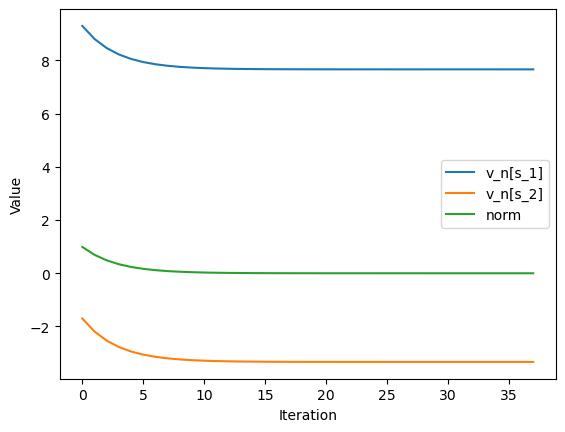

([7.666669698478934, -3.3333303015210656], 2)

In [20]:
value_itteration(0.7, 0.00001)